# 一致性のシミュレーション

## 標本平均の漸近分布

### 概要

標本平均$\bar{X}=\sum X_i / n$を標準化すると

$$
\frac{\bar{X}-\mathrm{E}(\bar{X})}{\sqrt{\operatorname{Var}(\bar{X})}}
=\frac{\bar{X}-\mu_X}{\sqrt{\sigma_X^2 / n}}
=\frac{\sqrt{n}\left(\bar{X}-\mu_X\right)}{\sigma_X}
$$


これは中心極限定理により

$$
\frac{\sqrt{n}\left(\bar{X}-\mu_X\right)}{\sigma_X} \xrightarrow{d} N(0,1)
$$

となる。式を整理して表現を少し変えると

$$
\sqrt{n}\left(\bar{X}-\mu_X\right) \xrightarrow{d} N\left(0, \sigma_X^2\right)
$$

である。

$\bar{X}$の分布が$N\left(\mu_X, \frac{\sigma_X^2}{n}\right)$に近似的に従う

$$
\bar{X} \stackrel{a}{\sim} N\left(\mu_X, \frac{\sigma_X^2}{n}\right)
$$

と表すこともできる。このことを「$\bar{X}$は漸近的に正規分布$N\left(\mu_X, \frac{\sigma_X^2}{n}\right)$に従う」という。

### シミュレーション

モンテカルロシミュレーションで標準誤差を確かめてみる

標準誤差が推定量$\sigma / \sqrt{n}$と近い値になっていることがわかる

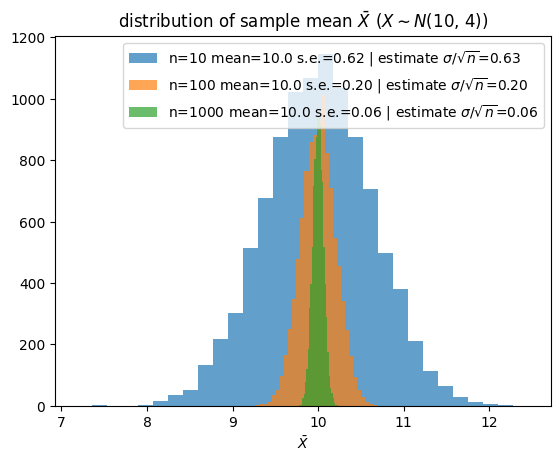

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# generate data
np.random.seed(0)
mu = 10
sigma = 2
n_iter = 10000
results = []
for n in [10, 100, 1000]:
    means = []
    errors = []
    for i_iter in range(n_iter):
        samples = np.random.normal(loc=mu, scale=sigma, size=n)
        # 標本平均 \bar{X}
        means.append(samples.mean())
        # 標準化した推定誤差
        mu_hat = samples.mean()
        error = np.sqrt(n) * (mu_hat - mu)
        errors.append(error)
    results.append({
        "n": n,
        "means": means,
        "errors": errors
    })

# plot
fig, ax = plt.subplots()
for result in results:
    n = result["n"]
    means = result["means"]
    ax.hist(means, label=f"{n=} mean={np.mean(means):.1f} s.e.={np.std(means):.2f} | " + r"estimate $\sigma/\sqrt{n}$" + f"={sigma/np.sqrt(n):.2f}", alpha=0.7, bins=30)
ax.legend()
ax.set(xlabel=r"$\bar{X}$", title=fr"distribution of sample mean $\bar X$ ($X \sim N$({mu}, {sigma**2}))")
fig.show()

標準化した推定誤差$\sqrt{n}\left(\bar{X}-\mu_X\right)$のシミュレーション結果も出してみる。

こちらは$n$についてスケールが整えられており、$n$が増えても分散が一定に、つまり

$$
\sqrt{n}\left(\bar{X}-\mu_X\right) \xrightarrow{d} N\left(0, \sigma_X^2\right)
$$

となっていることがわかる。

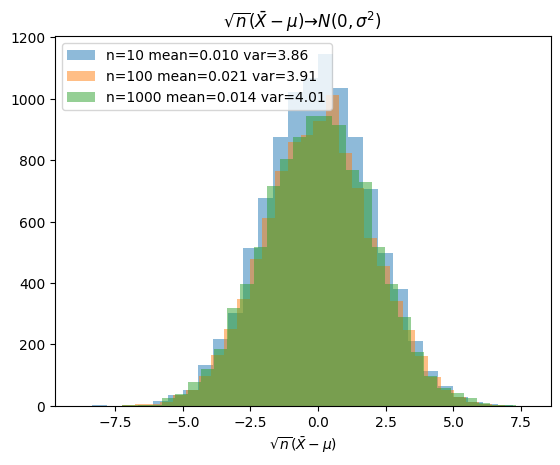

In [2]:
# plot
fig, ax = plt.subplots()
for result in results:
    n = result["n"]
    errors = result["errors"]
    ax.hist(errors, label=f"{n=} mean={np.mean(errors):.3f} var={np.var(errors):.2f}", alpha=0.5, bins=30)
ax.legend()
ax.set(xlabel=r"$\sqrt{n}(\bar{X} - \mu)$",
       title=r"$\sqrt{n}(\bar{X} - \mu) \to N(0, \sigma^2)$")
fig.show()

### 二項分布の場合

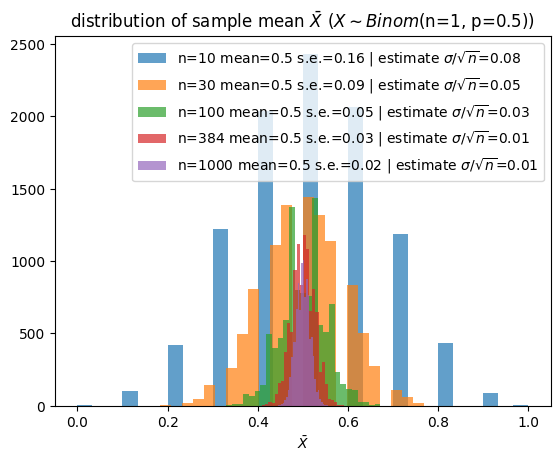

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# generate data
np.random.seed(0)
p = 0.5
mu = p
sigma = p * (1-p)
n_iter = 10000
results = []
for n in [10, 30, 100, 384, 1000]:
    means = []
    errors = []
    for i_iter in range(n_iter):
        samples = np.random.binomial(n=1, p=mu, size=n)
        # 標本平均 \bar{X}
        means.append(samples.mean())
        # 標準化した推定誤差
        mu_hat = samples.mean()
        error = np.sqrt(n) * (mu_hat - mu)
        errors.append(error)
    results.append({
        "n": n,
        "means": means,
        "errors": errors
    })

# plot
fig, ax = plt.subplots()
for result in results:
    n = result["n"]
    means = result["means"]
    ax.hist(means, label=f"{n=} mean={np.mean(means):.1f} s.e.={np.std(means):.2f} | " + r"estimate $\sigma/\sqrt{n}$" + f"={sigma/np.sqrt(n):.2f}", alpha=0.7, bins=30)
ax.legend()
ax.set(xlabel=r"$\bar{X}$", title=fr"distribution of sample mean $\bar X$ ($X \sim Binom$(n=1, p={p}))")
fig.show()